# Regression

## Single Linear Regression

## Multiple Linear Regression
Reference [Multiple Regression using Statsmodels](https://www.datarobot.com/blog/multiple-regression-using-statsmodels/) from DataRobot

In [2]:
#import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import statsmodels.api as sm

df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
X = df_adv[['TV', 'Radio','Newspaper']]
Y = df_adv['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 12 Nov 2016   Prob (F-statistic):           1.58e-96
Time:                        19:46:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#model.params
df_adv[['TV-fit']] = df_adv[['TV']] * model.params[1]
df_adv[['Radio-fit']] = df_adv[['Radio']] * model.params[2]
df_adv[['Newspaper-fit']] = df_adv[['Newspaper']] * model.params[3]

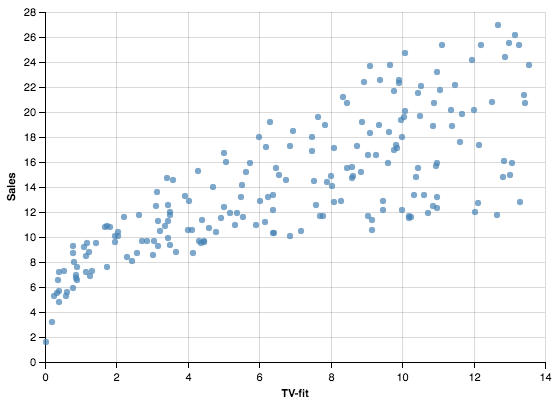

In [34]:
from altair import *

Chart(df_adv).mark_circle().encode(
    x='TV-fit',
    y='Sales',
)

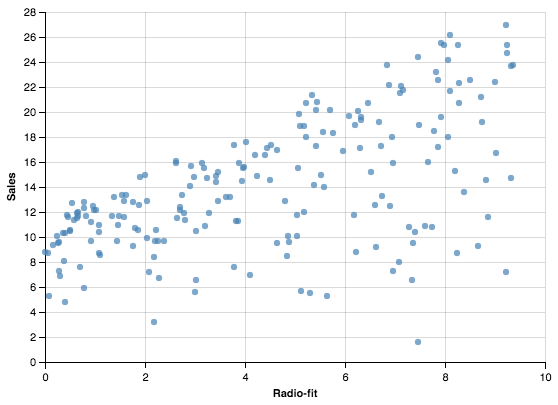

In [35]:
Chart(df_adv).mark_circle().encode(
    x='Radio-fit',
    y='Sales',
)

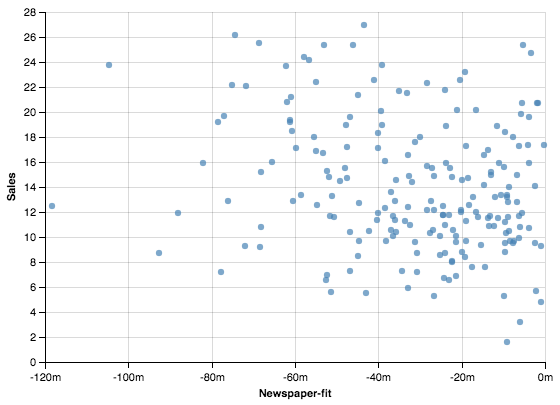

In [36]:
Chart(df_adv).mark_circle().encode(
    x='Newspaper-fit',
    y='Sales',
)